# **Sección 1:** Importar librerías

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


# **Sección 2:** Cargar el archivo CSV


In [4]:
df = pd.read_csv('iter_31_cpv2010.csv', encoding='latin1')
df.head()


,"ï»¿""entidad""",nom_ent,mun,nom_mun,loc,nom_loc,longitud,latitud,altitud,pobtot,...,vph_radio,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter,tam_loc
0,31,YucatÃ¡n,0,Total de la entidad YucatÃ¡n,0,Total de la Entidad,NaN,NaN,NaN,1955577,...,377161,462587,386610,344598,169501,129964,155513,335973,91839,NaN
1,31,YucatÃ¡n,0,Total de la entidad YucatÃ¡n,9998,Localidades de una vivienda,NaN,NaN,NaN,4513,...,882,666,504,318,280,79,68,566,44,NaN
2,31,YucatÃ¡n,0,Total de la entidad YucatÃ¡n,9999,Localidades de dos viviendas,NaN,NaN,NaN,1260,...,178,147,93,73,49,13,8,98,7,NaN
3,31,YucatÃ¡n,1,AbalÃ¡,0,Total del Municipio,NaN,NaN,NaN,6356,...,1086,1461,1009,866,168,31,42,681,7,NaN
4,31,YucatÃ¡n,1,AbalÃ¡,1,AbalÃ¡,894047.0,203848.0,10.0,1890,...,358,478,361,311,88,21,14,308,3,4.0


# **Sección 3:** Preprocesar datos y extraer solo el nivel municipio (*no localidad*)


In [5]:
df_mun = df[df['loc'] == 0]  # or '0000' 

df_mun = df_mun[['nom_mun', 'graproes', 'vph_inter', 'vph_pc', 'vph_aguadv', 'pobtot']]
df_mun = df_mun.replace('*', 0)
df_mun = df_mun.apply(pd.to_numeric, errors='ignore')
df_mun.head()


C:\Users\Messy\AppData\Local\Temp\ipykernel_9784\1064599528.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_mun = df_mun.apply(pd.to_numeric, errors='ignore')


,nom_mun,graproes,vph_inter,vph_pc,vph_aguadv,pobtot
0,Total de la entidad YucatÃ¡n,8.22,91839,129964,471292,1955577
3,AbalÃ¡,5.59,7,31,1542,6356
15,Acanceh,7.10,99,308,3615,15337
36,Akil,6.05,56,230,2392,10362
51,Baca,7.38,39,149,1427,5701


# **Sección 4:** Calcular porcentajes de acceso (servicios / población total)

In [6]:
df_mun['perc_internet'] = (df_mun['vph_inter'] / df_mun['pobtot'] * 100).clip(upper=100)
df_mun['perc_pc'] = (df_mun['vph_pc'] / df_mun['pobtot'] * 100).clip(upper=100)
df_mun['perc_aguadv'] = (df_mun['vph_aguadv'] / df_mun['pobtot'] * 100).clip(upper=100)

df_mun[['nom_mun', 'graproes', 'perc_internet', 'perc_pc', 'perc_aguadv']].head()


,nom_mun,graproes,perc_internet,perc_pc,perc_aguadv
0,Total de la entidad YucatÃ¡n,8.22,4.696261,6.645813,24.099895
3,AbalÃ¡,5.59,0.110132,0.487728,24.260541
15,Acanceh,7.10,0.645498,2.008215,23.570451
36,Akil,6.05,0.540436,2.219649,23.084347
51,Baca,7.38,0.684091,2.613577,25.030696


# **Sección 5:** Visualizaciones: Relación escolaridad vs acceso a servicios


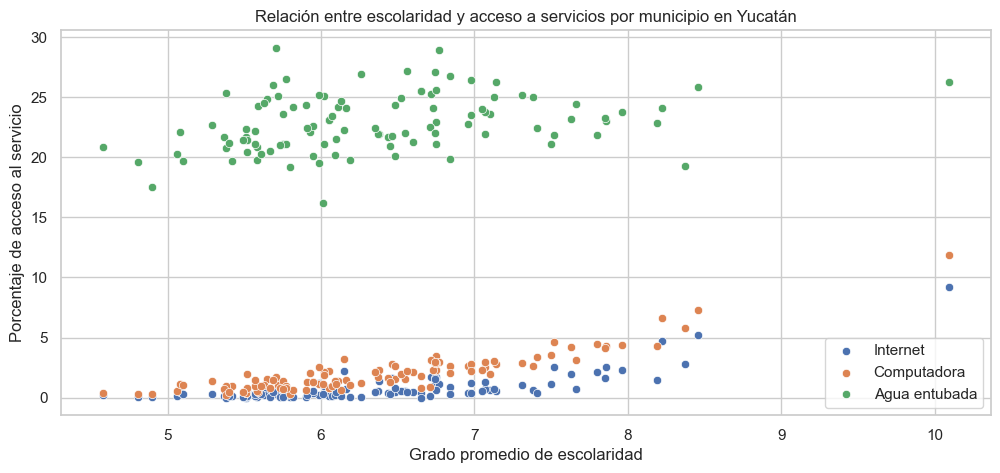

In [7]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_mun, x='graproes', y='perc_internet', label='Internet')
sns.scatterplot(data=df_mun, x='graproes', y='perc_pc', label='Computadora')
sns.scatterplot(data=df_mun, x='graproes', y='perc_aguadv', label='Agua entubada')
plt.xlabel("Grado promedio de escolaridad")
plt.ylabel("Porcentaje de acceso al servicio")
plt.title("Relación entre escolaridad y acceso a servicios por municipio en Yucatán")
plt.legend()
plt.show()


# **Sección 6:** Relación estadística (correlación)


In [8]:
correlaciones = df_mun[['graproes', 'perc_internet', 'perc_pc', 'perc_aguadv']].corr()
print("Correlaciones entre escolaridad y servicios:")
print(correlaciones)


Correlaciones entre escolaridad y servicios:
               graproes  perc_internet   perc_pc  perc_aguadv
graproes       1.000000       0.749580  0.888416     0.324187
perc_internet  0.749580       1.000000  0.938952     0.218941
perc_pc        0.888416       0.938952  1.000000     0.279813
perc_aguadv    0.324187       0.218941  0.279813     1.000000


# **Sección 7:** Clasificación de municipios rezagados/avanzados


In [9]:
rezagados = df_mun[
    (df_mun['graproes'] < df_mun['graproes'].quantile(0.2)) &
    ((df_mun['perc_internet'] < df_mun['perc_internet'].quantile(0.2)) |
     (df_mun['perc_pc'] < df_mun['perc_pc'].quantile(0.2)) |
     (df_mun['perc_aguadv'] < df_mun['perc_aguadv'].quantile(0.2)))
]

avanzados = df_mun[
    (df_mun['graproes'] > df_mun['graproes'].quantile(0.8)) &
    ((df_mun['perc_internet'] > df_mun['perc_internet'].quantile(0.8)) |
     (df_mun['perc_pc'] > df_mun['perc_pc'].quantile(0.8)) |
     (df_mun['perc_aguadv'] > df_mun['perc_aguadv'].quantile(0.8)))
]

print("Municipios rezagados:\n", rezagados['nom_mun'].tolist())
print("Municipios avanzados:\n", avanzados['nom_mun'].tolist())


Municipios rezagados:
 ['AbalÃ¡', 'Cantamayec', 'ChacsinkÃ\xadn', 'Chankom', 'Chemax', 'DzitÃ¡s', 'Dzoncauich', 'HuhÃ\xad', 'MayapÃ¡n', 'Sotuta', 'TahdziÃº', 'Tetiz', 'Timucuy', 'Tixcacalcupul', 'Uayma', 'YaxcabÃ¡']
Municipios avanzados:
 ['Total de la entidad YucatÃ¡n', 'Baca', 'Conkal', 'Chicxulub Pueblo', 'ChocholÃ¡', 'DzidzantÃºn', 'Dzilam de Bravo', 'KanasÃ\xadn', 'MÃ©rida', 'MocochÃ¡', 'Motul', 'Progreso', 'Telchac Pueblo', 'Ticul', 'Tixkokob', 'TixpÃ©hual', 'UmÃ¡n', 'Valladolid', 'Yaxkukul']
